# **REDES NEURAIS RECORRENTE**

Sabe quando você vê algo acontercer tantas vezes que só de ver o início de algo você já sabe o que vai vir no final? Como por exemplo seu tio iniciando a piada do pavê. Quando ele a faz da primeira vez você cai, mas depois você já nota isso e no natal do ano seguinte você já sabe até a hora que ele vai fazer essa piada. Então, uma rede recorrente segue a mesma ideia.

Uma RNN absorve informações passadas, as armazenam e utiliza para prever acontecimentos futuros. E essa capacidade de guardar informações é o que a diferencia de uma rede convencional. Numa rede convencional a informação entra na rede, passa pelos neurônios e gera uma saída e depois “some”. Já na RNN isso não acontece, tudo que entra na rede é mantido nela, isso faz com que a rede possa sempre utilizar essas informações para melhorar a sí mesma (esse processo é exatamente igual ao nosso processo de aprendizagem, nós observamos tudo que acontece, treinamos e guardamos as informações adquiridas nesses treinos para então chegarmos a “perfeição”). No diagrama abaixo é possível entender melhor como é esse processo de armazenamento da informação em um RNN.

![](https://machinelearningblogcom.files.wordpress.com/2018/02/bildschirmfoto-2018-02-21-um-10-30-04.png?w=1400)

Fonte: https://machinelearning-blog.com/2018/02/21/recurrent-neural-networks/


Veja que sempre que uma informação passa por um neurônio ela retorna para o início do mesmo. Esse processo acaba sendo equivalente a criar várias camadas na rede. Ou seja, quanto mais informações estão passando pela rede, maior ela fica. 

Porém é obvio que isso não iria ser uma maravilha dessas sem nenhum probleminha. E o problema em questão é o valor do gradiente, que pode ser extremamente baixo ou extremamente alto. Isso ocorre pois no processo de treinamento de uma rede temos que sempre ir calculando o valor do gradiente, e durante esse calculo ele é multiplicado pelo valor dos pesos em cada uma das camadas (backpropagation), e se tivermos pesos pequenos, o valor do gradiente vai ser pequeno, mas se tivermos dezenas ou centenas de pesos muito pequenos a multiplicação deles vai gerar um resultado extremente pequeno. Isso ocasiona uma modificação quase insignificante no valor dos pesos, ou seja, se fizermos um treinamento com 10 mil épocas, o valor dos pesos podem ter se auterado tanto quanto se tivessemos feito um treinamento com apenas mil épocas. E o contrário também ocorre, os pesos podem ser muito grandes, gerante valores grandes de gradiente que por sua vez variará muito os pesos, fazendo com que a rede jamais convirja. Respectivamente esses problemas são o Vanish Gradient e o Exploding gradient.

## LSTM

Para solucionar esses problemas entra a rede LSTM. Que é uma variante da RNN e que não passa por esses dois problemas.

O segredo de uma LSTM é que ela seleciona quais informações dentre as que chegam que são relevantes e “merecem” serem passadas adiante. Isso faz com que a rede não cresça exacerbadamente, e evita os dois problemas.

Veja abaixo duas imagens que representam, respectivamente, os diagramas de uma célula de RNN convencional e um LSTM.

![](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-SimpleRNN.png)

Fonte: http://colah.github.io/posts/2015-08-Understanding-LSTMs/

![](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png)

Fonte: http://colah.github.io/posts/2015-08-Understanding-LSTMs/



Para entender melhor como funciona uma rede recorrente recomendo fortemente a leitura do artigo que está nesse [link](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).

 ---       
- Links para aprender mais:
    - [Introdução a redes neurais recorrentes - Jones Granatyr](https://www.youtube.com/watch?v=ZvBJxh5O3H0&feature=youtu.be)
    - [The Sequential Problem - Cognitive Class](https://www.youtube.com/watch?v=PIjH2Ki9mfE&feature=youtu.be)
    - [The RNN Model - Cognitive Class](https://www.youtube.com/watch?v=sTejVvlom2Q&feature=youtu.be)
    - [Recurrent Neural Networks (RNN) - Ryan Partridge](https://goo.gl/eiyYxj)
    - [Understanding LSTM Networks - Colah's blog](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)
    - [Understanding LSTM and its diagrams - Shi Yan](https://medium.com/mlreview/understanding-lstm-and-its-diagrams-37e2f46f1714)
    - [The LSTM Model - Cognitive Class](https://www.youtube.com/watch?v=lsRLV7p6WQc&feature=youtu.be)
    - [Applying RNNs to Language Modelling - Cognitive Class](https://www.youtube.com/watch?v=PY3VMUArFgs&feature=youtu.be)
    - [Recurrent Neural Network - The Math of Intelligence - Siraj Raval](https://www.youtube.com/watch?v=BwmddtPFWtA)
    - [LSTM Networks - The Math of Intelligence - Siraj Raval](https://www.youtube.com/watch?v=9zhrxE5PQgY)
---

# **IMPLEMENTAÇÃO**
## IMPORTANDO BIBLIOTECAS

In [1]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

## CARREGANDO DATASET
Esse exemplo tratará de prever valores y com base nos valores y anteriores. Ou seja, eu vou utilizar apenas uma coluna, no caso utilizarei a última coluna da base de dados, que normalmente é o y_train. Sendo assim o que preveremos será os valores da classe. Basicamente esse é um problema de regressão, que não utiliza os valores de x.

Porém temos que pensar em alguns pontos importantes aqui, pois a parte de trabalhar os dados é com toda certeza a parte mais confusa da implementação de uma rede recorrente. Os dados de y serão ao mesmo tempo os valores base e os valores desejados. Ou seja, eles são aqueles valores que temos para inserir no modelo e também os valores que queremos no final.

Os valores que utilizaremos estão em uma sequência de ocorrências, ou seja, depois que uma quantidade x de valores aparecerem o proximo vai ser x+1, e agora esse valor x+1 vai compor o novo grupo que preverá x+2, e assim por diante. Ou seja, se tivermos na base de dados os seguintes valores: 
- a, b, c, d, e, f, g. 
- Nós vamos treinar o modelo para que ele faça o seguinte: 
  - 1º - entra [a,b,c] e tem que sair d.
  - 2º - entra [b,c,d] e tem que sair e.
  - 3º - entra [c,d,e] e tem que sair f.
  - 4º - entra [d,e,f] e tem que sair g.
- Veja que se compararmos com o que temos em uma rede neural convencional, os termos entre colchetes são os valores de x, e os valores que estão ao final das frases seriam os valores de y. Ficando da seguinte forma:

|x1|x2|x3|y|
|-|-|-|-|
|a|b|c|d|
|b|c|d|e|
|c|d|e|f|
|d|e|f|g|
    
Então o que precisamos fazer com a nossa base de dados é exatamente isso.
## SABENDO DISSO VAMOS COMEÇAR

In [2]:
(_, x),(_,_) = tf.keras.datasets.boston_housing.load_data(test_split=0)
x.shape

57344/57026 [==============================] - 0s 0us/step


(506,)

### **Escalonando os dados**
Por se tratar de um problema de regressão é necessário escalornar os dados.

In [3]:
x = x.reshape(506,1)
scaler = StandardScaler()
x = scaler.fit_transform(x)

### **Dividindo a base de dados**
Vamos trabalhar em uma proporção de 80% da base de dados para treinamento e o restante para teste.

In [4]:
x_train, x_test = x[:int(len(x)*0.8)], x[int(len(x)*0.8):]

In [5]:
x_train.shape

(404, 1)

In [6]:
x_test.shape

(102, 1)

### **Montando a base de dados para o modelo**
Como dito anteriormente, precisamos agrupar a base em porções e definir os valores que vem após esse grupo, ou seja, precisamos criar x e y.

- Para x: Vamos agrupar os valores de 32 em 32, assim o 33º valor será o nosso y.
> Ao final do processo é necessário colocar os dados dentro de um numpy array para podermos trabalhar posteriormente.

In [7]:
# Base de treinamento
y_train = []
x_train_novo = []
batch = 32 # quantidade de termos que serão agrupados

# Agrupando os termos
for i in range(len(x_train)-batch):
    lista = []
    for j in range(batch):
        lista.append(x_train[i+j][0])
    x_train_novo.append(lista)
    y_train.append(x_train[i+batch])
    
# Transformando em numpy array
x_train_novo = np.asarray(x_train_novo)  
y_train_novo = np.asarray(y_train)

# Base de teste
y_test = []
x_test_novo = []

# Agrupando os termos
for i in range(len(x_test)-batch):
    lista = []
    for j in range(batch):
        lista.append(x_test[i+j][0])
    x_test_novo.append(lista)
    y_test.append(x_test[i+batch])

# Transformando em numpy array
x_test_novo = np.asarray(x_test_novo)  
y_test_novo = np.asarray(y_test)

In [8]:
print(x_train_novo.shape)
print(y_train_novo.shape)

(372, 32)
(372, 1)


In [9]:
print(x_test_novo.shape)
print(y_test_novo.shape)

(70, 32)
(70, 1)


# **CRIANDO O MODELO**
Agora que a base de dados está toda ajustada para o nosso caso, podemos efetuar a criação do modelo e o treinamento da rede.

A construção da rede será dada pela seguinte estrutura:
- Quatro blocos com
  - Layer LSTM: 100 céluas
  - Layer Dropout: 20%
- Saída
  - Rede densa com um neurônio e função de ativação linear.
  
> OBS.: Para trabalhar com GPU deve-se utilizar o layer CuDNNLSTM, pois ele é preparado para isso, logo possui melhor desempenho.

> OBS.: Para os layers LSTM intermediários é necessário utilizar o parâmetro `return_sequences = True`.

In [10]:
model = tf.keras.models.Sequential()

# 1º Bloco
model.add(tf.keras.layers.CuDNNLSTM(100, return_sequences=True, input_shape=(x_train_novo.shape[1],1)))
model.add(tf.keras.layers.Dropout(0.2))

# 2º Bloco
model.add(tf.keras.layers.CuDNNLSTM(units=100, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))

# 3º Bloco
model.add(tf.keras.layers.CuDNNLSTM(units=100, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))

# 4º Bloco
model.add(tf.keras.layers.CuDNNLSTM(units=100))
model.add(tf.keras.layers.Dropout(0.2))

# Saída
model.add(tf.keras.layers.Dense(1, activation='linear'))

# Visualizar estrutura da rede
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm (CuDNNLSTM)       (None, 32, 100)           41200     
_________________________________________________________________
dropout (Dropout)            (None, 32, 100)           0         
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 32, 100)           80800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 100)           0         
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 32, 100)           80800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 100)           0         
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 100)               80800     
__________

# **TREINAMENTO**
## CONFIGURANDO O TREINAMENTO
Por se tratar de um problema de regressão temos que colocar as medidas para verificar o erro médio quadrático. E para ajudar mais ainda com o problema do gradiente o otimizador será o `rmsprop`.

In [11]:
model.compile(optimizer='rmsprop',
             loss='mse')

## TREINANDO
Para o treinamento vou utilizar mil épocas, e o parâmetro, callback ReduceLROnPlateau, que irá reduzior o learning rate conforme a perda (loss) não esteja diminuindo, fazendo assim o medelo se adequar melhor.

Porém primeiro precisamos modificar a forma dos valores de entrada (x_train e x_test), pois eles devem possuir um formato específico.

In [12]:
x_train_novo = x_train_novo.reshape(x_train_novo.shape[0], x_train_novo.shape[1], 1)
x_test_novo = x_test_novo.reshape(x_test_novo.shape[0], x_test_novo.shape[1], 1)

In [13]:
model.fit(x_train_novo, y_train_novo, epochs=1000, batch_size=1, verbose=0,callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='loss')])

# **PREVENDO VALORES DE TESTE**
Como os valores foram escalonados no início da implementação, o correto é que façamos a inversão para os valores voltarem para a escala real. E então depois podemos plotar um gráfico com os resultados esperados e os resultados previstos.

In [14]:
previstos = scaler.inverse_transform(model.predict(x_test_novo))
y_test_novo = scaler.inverse_transform(y_test_novo)

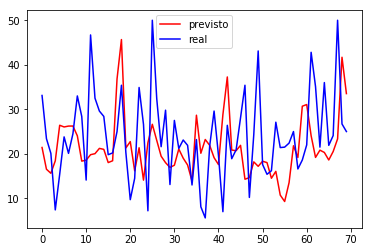

In [15]:
plt.plot(previstos, 'red', label='previsto')
plt.plot(y_test_novo, 'blue', label='real')
plt.legend()